In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
dataset = pd.read_csv('data/churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


# cleaning data

In [5]:
#removing NaN
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [6]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

base on these numbers since nulls are so big we gonna remove those columns

In [7]:
#get all the rows which age is not null
dataset = dataset[pd.notnull(dataset['age'])]

In [8]:
#remove credit_score and reward_earned
dataset = dataset.drop(columns=['credit_score','rewards_earned'])

In [9]:
dataset.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

# Plotting 

In [10]:
#histograms
dataset2 = dataset.drop(columns=['user','churn'])

In [11]:
'''fig = plt.figure(figsize=(15,12))
plt.suptitle("Histograms of Numerical Columns",fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,6,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals)
plt.tight_layout(rect=[0,0.03,1,0.95])'''

'fig = plt.figure(figsize=(15,12))\nplt.suptitle("Histograms of Numerical Columns",fontsize=20)\nfor i in range(1,dataset2.shape[1]+1):\n    plt.subplot(6,6,i)\n    f = plt.gca()\n    f.axes.get_yaxis().set_visible(False)\n    f.set_title(dataset2.columns.values[i-1])\n    \n    vals = np.size(dataset2.iloc[:,i-1].unique())\n    plt.hist(dataset2.iloc[:,i-1],bins=vals)\nplt.tight_layout(rect=[0,0.03,1,0.95])'

Pie plots

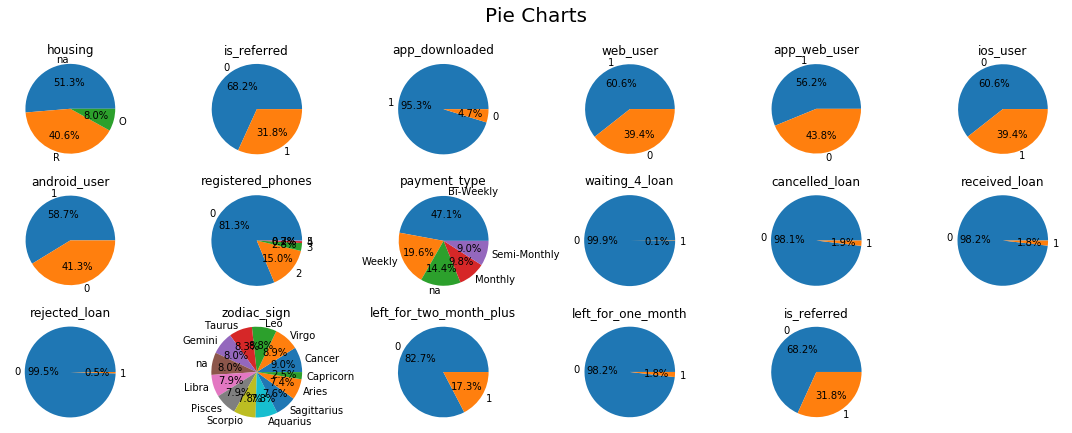

In [12]:
dataset2 = dataset[['housing','is_referred','app_downloaded','web_user','app_web_user','ios_user','android_user','registered_phones',
                    'payment_type','waiting_4_loan','cancelled_loan','received_loan','rejected_loan','zodiac_sign','left_for_two_month_plus',
                    'left_for_one_month','is_referred']]
fig = plt.figure(figsize=(15,12))
plt.suptitle("Pie Charts",fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,6,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    values = dataset2.iloc[:,i-1].value_counts(normalize=True).values
    index = dataset2.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0,0.03,1,0.95])

waiting_4_loan,cancelled_loan,_recieved_loan,rejected_loan,left_for_one_month these precentage are too small,what we can do is check if these subsets have bias for the response variable(churn rate) 

0    27
1     8
Name: churn, dtype: int64

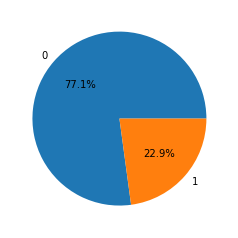

In [13]:
#check when waiting_4_loan==1 what is the churn value
vals = dataset[dataset2.waiting_4_loan==1].churn.value_counts()
plt.pie([vals[0],vals[1]],labels=['0','1'],autopct='%1.1f%%')
vals

27 to 8 ratio means we can assume there is no bias for response from this field

1    274
0    234
Name: churn, dtype: int64

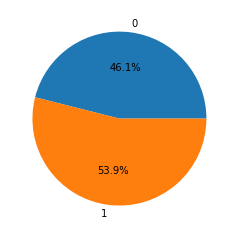

In [14]:
#check when cancelled_loan==1 what is the churn value
vals= dataset[dataset2.cancelled_loan==1].churn.value_counts()
plt.pie([vals[0],vals[1]],labels=['0','1'],autopct='%1.1f%%')
vals

1    292
0    199
Name: churn, dtype: int64

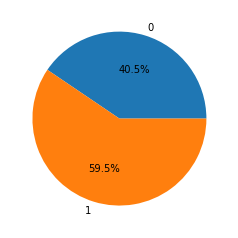

In [15]:
#check when received_loan==1 what is the churn value
vals = dataset[dataset2.received_loan==1].churn.value_counts()
plt.pie([vals[0],vals[1]],labels=['0','1'],autopct='%1.1f%%')
vals

1    107
0     25
Name: churn, dtype: int64

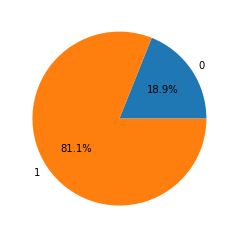

In [16]:
#check when rejected_loan==1 what is the churn value
vals = dataset[dataset2.rejected_loan==1].churn.value_counts()
plt.pie([vals[0],vals[1]],labels=['0','1'],autopct='%1.1f%%')
vals

1    266
0    222
Name: churn, dtype: int64

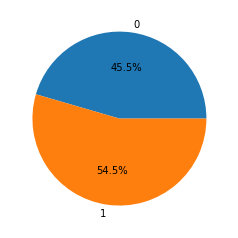

In [17]:
#check when left_for_one_month==1 what is the churn value
vals = dataset[dataset2.left_for_one_month==1].churn.value_counts()
plt.pie([vals[0],vals[1]],labels=['0','1'],autopct='%1.1f%%')
vals

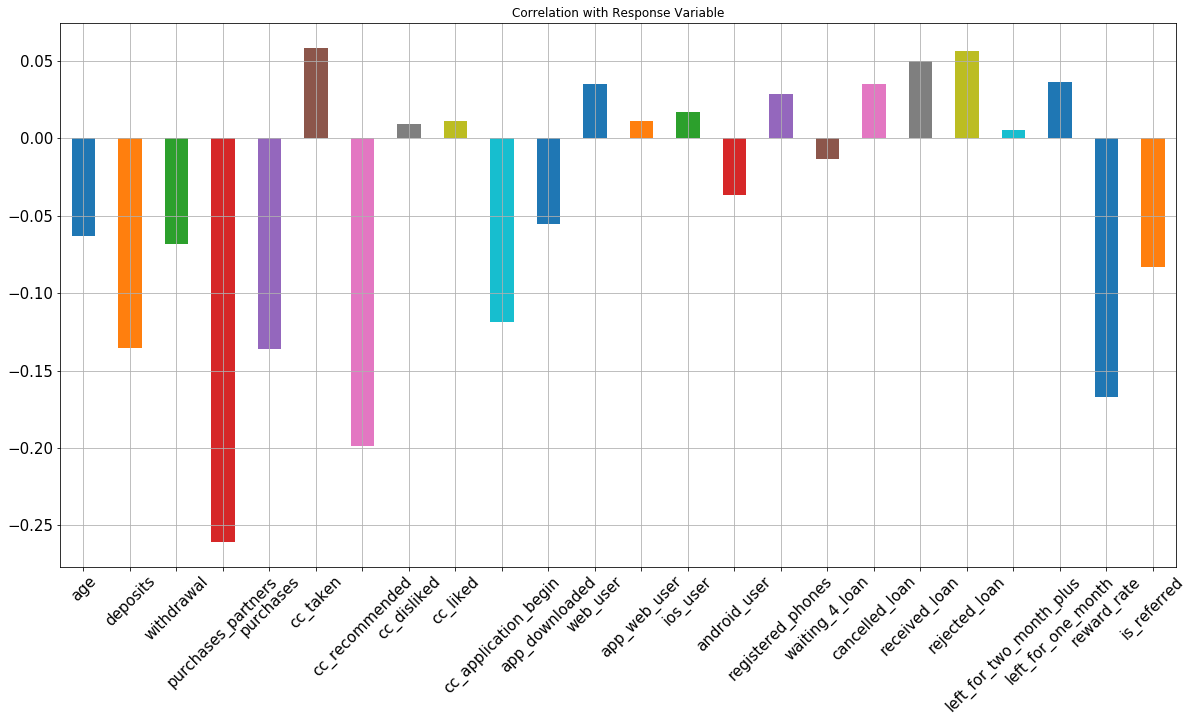

In [18]:
#plotting correlations
dataset.drop(columns=['churn','user','housing','payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar(figsize=(20,10),title="Correlation with Response Variable",fontsize=15,rot=45,grid=True)

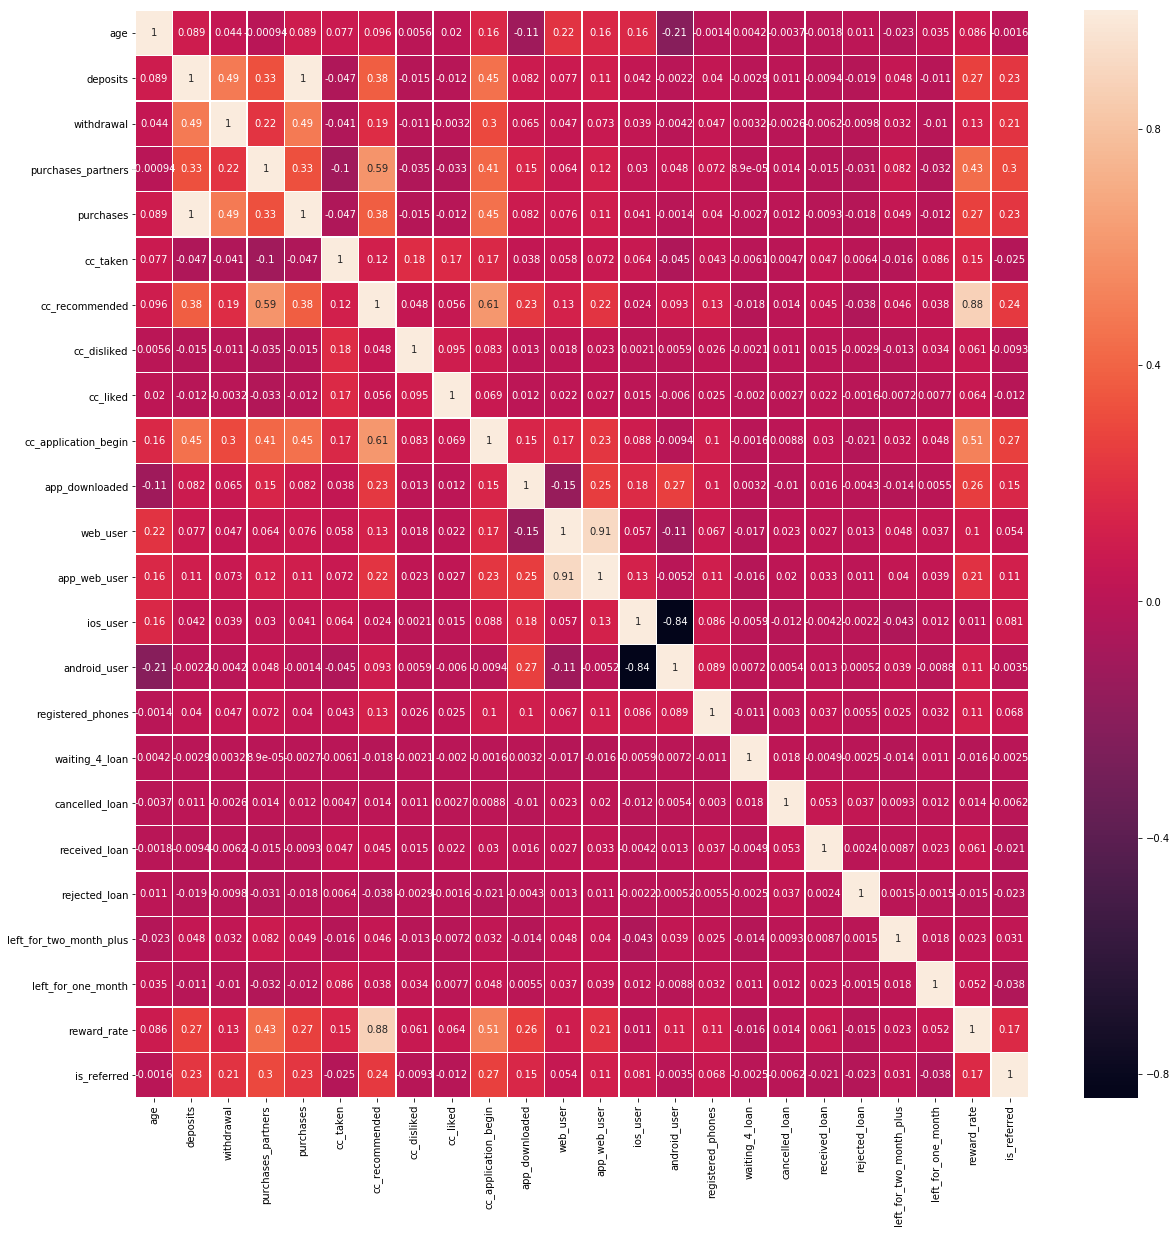

In [19]:
#correlation matrix
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset.drop(columns=['churn','user']).corr(),annot=True,ax=ax,linewidths=.5,)

In [20]:
#we can get rid of app_web_user field because its a function of app_downloaded and web_user=> if both 1 app_web_user also 1
dataset  = dataset.drop(columns=['app_web_user'])

#save new csv file with cleaned dataset for model building
dataset.to_csv('data/new_churn_data.csv',index=False)